#   Inferential statistic Non-parametric: **Mann-Whitney U Test**

Diferencias significativas cuando la distribución no permite utilizar t-test. Sin asumir normalidad


![Non-parametric](../manuals/figures/flowchart_nonparametric.png)
- https://pingouin-stats.org/build/html/index.html


In [32]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [33]:
# Path to the file to be imported
path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
co2_data = import_csv(path)

In [34]:
co2_data.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,05/03/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,05/03/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,05/03/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,05/03/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,05/03/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


## Mann-Whitney U test

In [35]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

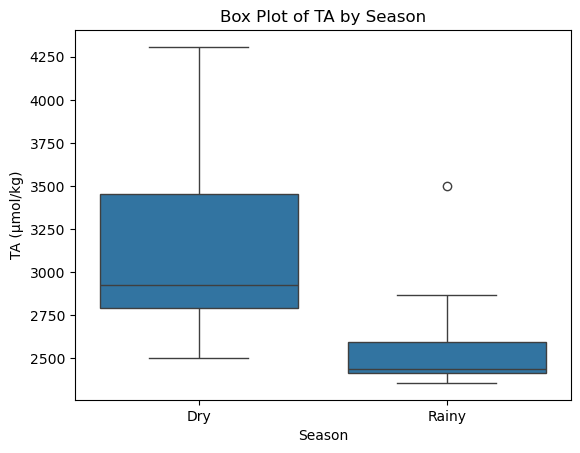

In [36]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='ta_micromol_kg', data=co2_data)
#sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

In [37]:
# Filter the TA data by season
ta_dry = co2_data.loc[co2_data["season"] == "Dry", "ta_micromol_kg"]
ta_rainy = co2_data.loc[co2_data["season"] == "Rainy", "ta_micromol_kg"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(ta_dry, ta_rainy)


U statistic = 2251.5
p-value = 3.618607122062942e-12
The difference is statistically significant.


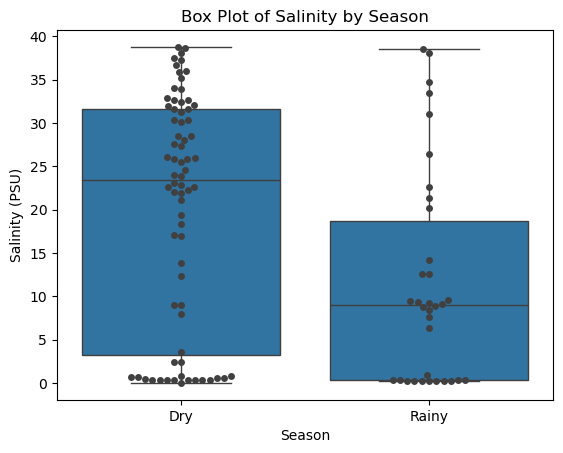

In [38]:
# Plot the box plot of TA by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='sal_psu', data=co2_data)
sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()

In [39]:
# Filter the salinity data by season
sal_dry = co2_data.loc[co2_data["season"] == "Dry", "sal_psu"]
sal_rainy = co2_data.loc[co2_data["season"] == "Rainy", "sal_psu"]

# Perform the Mann-Whitney U test for salinity between dry and rainy seasons
mann_whitney_test(sal_dry, sal_rainy)

U statistic = 1660.0
p-value = 0.003199701027350606
The difference is statistically significant.


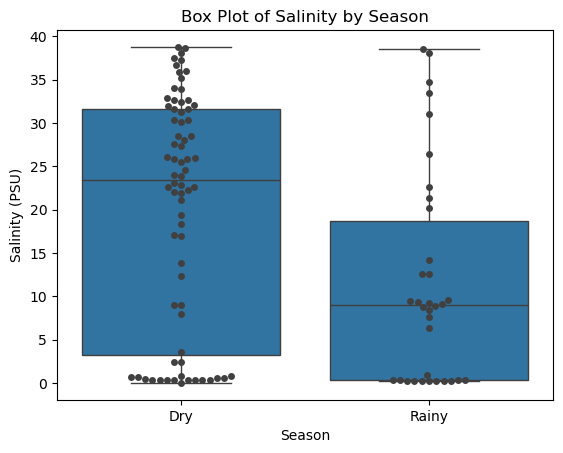

In [40]:
# Plot the box plot of salinity by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='sal_psu', data=co2_data)
sns.swarmplot(x='season', y='sal_psu', data=co2_data, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()

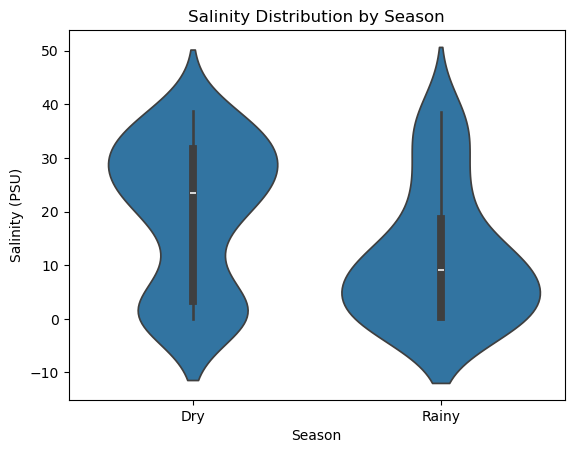

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
sns.violinplot(x='season', y='sal_psu', data=co2_data)

plt.title('Salinity Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.show()

### Exercise: "Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses."

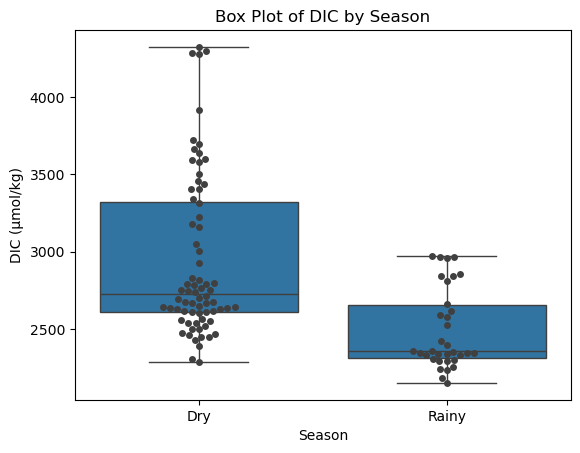

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='season', y='dic_micromol_kg', data=co2_data)
sns.swarmplot(x='season', y='dic_micromol_kg', data=co2_data, color=".25")

plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.title('Box Plot of DIC by Season')

plt.show()

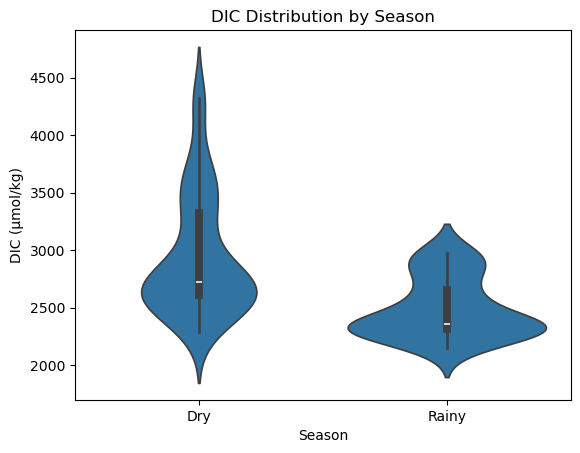

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x='season', y='dic_micromol_kg', data=co2_data)

plt.title('DIC Distribution by Season')
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.show()

In [51]:
dic_dry = co2_data.loc[co2_data["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = co2_data.loc[co2_data["season"] == "Rainy", "dic_micromol_kg"]
mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.


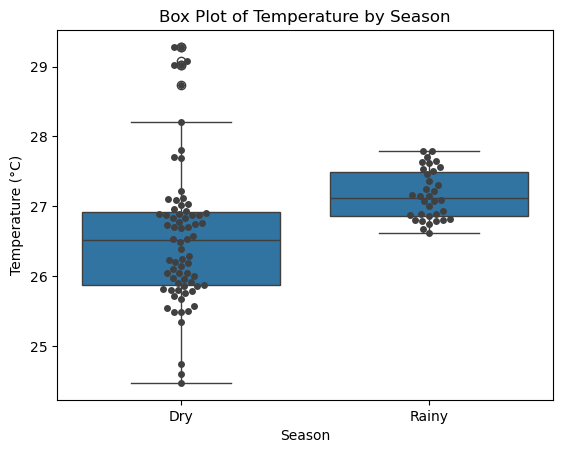

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='season', y='temp_c', data=co2_data)
sns.swarmplot(x='season', y='temp_c', data=co2_data, color=".25")

plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Temperature by Season')

plt.show()

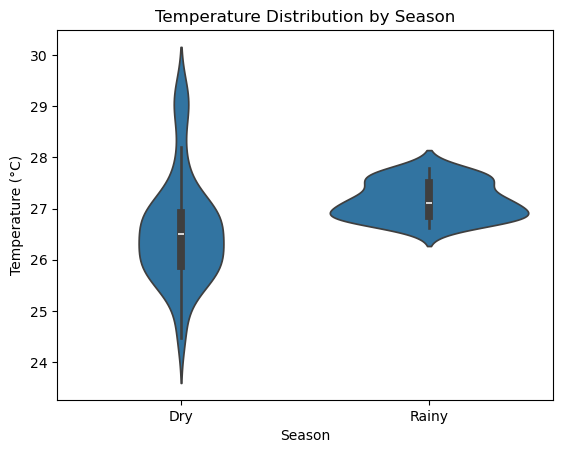

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x='season', y='temp_c', data=co2_data)

plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

In [50]:

temp_dry = co2_data.loc[co2_data["season"] == "Dry", "temp_c"]
temp_rainy = co2_data.loc[co2_data["season"] == "Rainy", "temp_c"]
mann_whitney_test(temp_dry, temp_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026
- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026